## What are we going to cover?
* Understanding and application of various types of plots :
    * Scatter plot
    * Regression plots
    * Bubble plot
* Applying syntax variations to cater to different scenarios

# Scatter plots and regression plots

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Simple scatter plots

Seaborn doesn't have a dedicated function for creating a scatter plot - instead we use the functions for creating a regression plot, and choose to either show or hide the regression line according to our requirement

In [2]:
from numpy.random import randn
x = randn(100)
y = randn(100)

**`regplot()` is the low-level plotting function for creating regression plots (or scatter plots)**

The default is to display the linear regression fit, so we set `fit_reg =` `**False**` to suppress it. We'll also specify a few properties of the markers using a dictionary

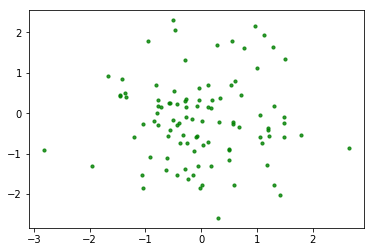

In [7]:
sns.regplot(x = x, y = y, scatter_kws = {'s':10, 'color':'g'},fit_reg=False)

Let's do another example with some more meaningful data

In [8]:
df = sns.load_dataset('iris')

In [9]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


The function `lmplot()` is built on top of `regplot()`

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


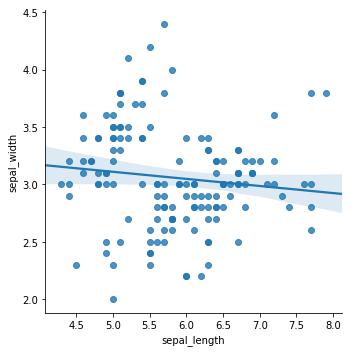

In [10]:
sns.lmplot('sepal_length', 'sepal_width', data = df, fit_reg = True)

We can also create scatter plots with the *matplotlib* function `scatter()` - because two ways to do the same thing is not quite enough!

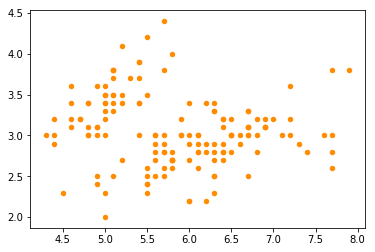

In [12]:
plt.scatter('sepal_length', 'sepal_width', data = df, s = 20, c = 'darkorange')

### Scatterplot matrix to explore the pairwise relationships between variables

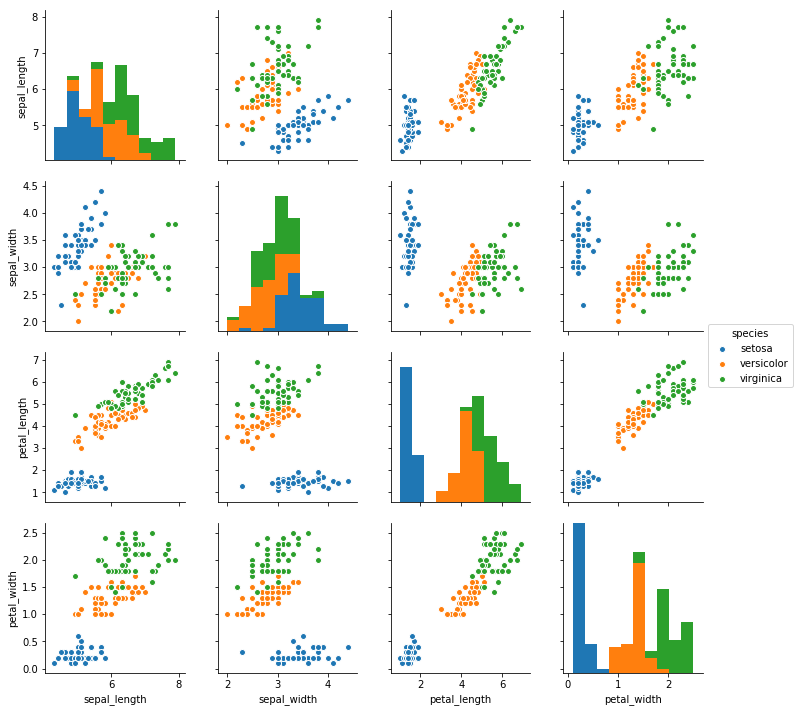

In [13]:
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue = 'species')

### Regression plots

In [14]:
tips = pd.read_csv('data/tips.csv')

In [15]:
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [16]:
tips.shape

(244, 7)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


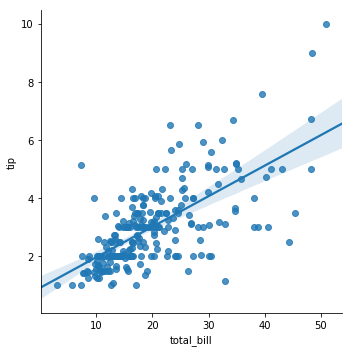

In [17]:
sns.lmplot('total_bill','tip',data = tips) # plots LM fit

We can control various aesthetic elements of the plot - we'll do this by defining various settings for the scatter and the line using a dictionary for each

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


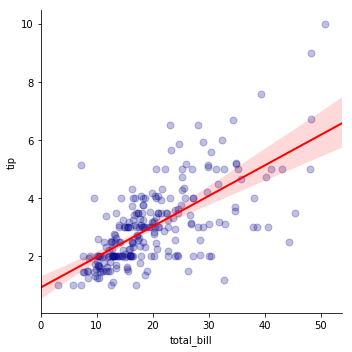

In [24]:
sns.lmplot('total_bill','tip',tips,
          scatter_kws = {'marker':'o','color':'darkblue','alpha':0.25, 's':48},
          line_kws = {'linewidth':2,'color':'red'})

**Note:**
<br>
`lmplot()` can also fit higher order polynomials:

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


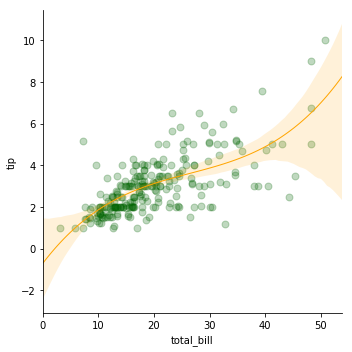

In [26]:
sns.lmplot('total_bill','tip',tips,order = 3,
          scatter_kws = {'marker':'o','color':'darkgreen','alpha':0.25, 's':48},
          line_kws = {'linewidth':1,'color':'orange'})

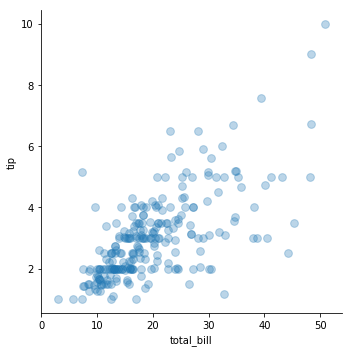

In [27]:
sns.lmplot('total_bill','tip',tips,fit_reg = False,
           scatter_kws = {'alpha':0.3, 's':60}) # suppress the regression line and only show scatterplot

Plot tip as a percent of the total bill against size (discrete)

In [28]:
tips['tip_pct'] = 100*(tips['tip']/tips['total_bill'])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


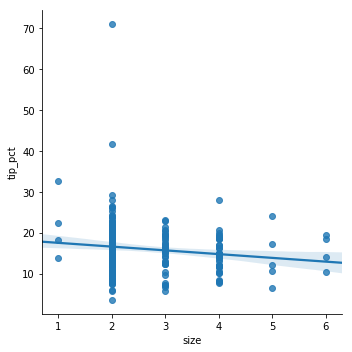

In [29]:
sns.lmplot('size','tip_pct',data = tips)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


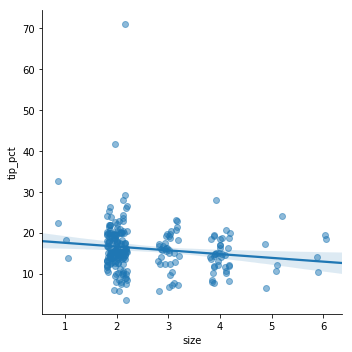

In [30]:
sns.lmplot('size','tip_pct',tips,x_jitter = 0.2,scatter_kws = {'alpha':0.5}) # add a bit of jitter along X

In [ ]:
sns.lmplot('size','tip_pct',tips,x_estimator = np.mean) # show an estimate of tendency for each bin

### Plotting separate regressions for different subsets of data

Let's look at the relationship between sepal length and sepal width in the iris data

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


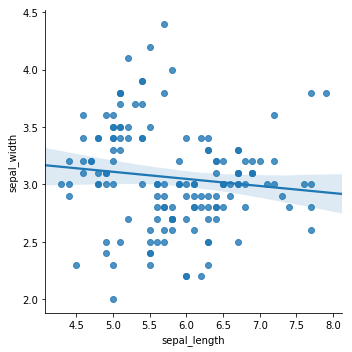

In [31]:
sns.lmplot('sepal_length','sepal_width',iris)

Looks like there's hardly any relationship, or at best a very weak negative relationship. But this doesn't make much sense - we would expect these two to be positively related. The problem here is we're fitting one regression line to all of the data, while in fact there are three distinct subsets (corresponding to the three species) and in each of these there might be a different relationship between these two variables. So, the logical thing to do is to plto a separate fit for each species:

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


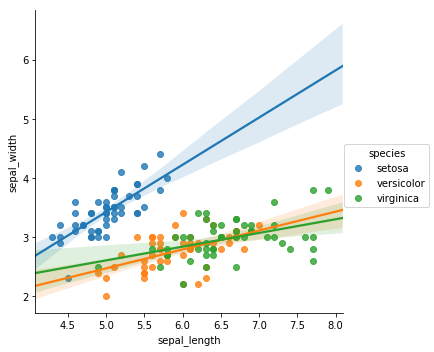

In [32]:
sns.lmplot('sepal_length','sepal_width', iris, hue = 'species')

Makes a lot more sense!

Let's look at another example - the tips data set above

In [ ]:
sns.lmplot('total_bill','tip_pct',tips)

Is there a difference in tipping behaviour between the genders? Let's find out...

In [ ]:
sns.lmplot('total_bill','tip_pct',tips,
           hue = 'sex',
           markers = ['x','o']) # map hue to a factor (here 'sex') and markers to a list

Appears there's no appreciable difference between males and females in this regard. How about on different days of the week?

In [ ]:
sns.lmplot('total_bill','tip_pct',tips,hue = 'day')

### Loess or local regression

Users of the R package *ggplot2* will know that for the `geom_smooth()` method in that package, Loess is the default setting

In [ ]:
sns.lmplot('total_bill','tip_pct',tips,lowess = True,
           scatter_kws = {'alpha':0.25,'color':'red'}) # similar to R:scatter.smooth()

`lmplot()` calls the lower level function `regplot()`, which we have seen earlier; `regplot()` can also be called directly as we have seen

In [ ]:
sns.regplot('total_bill','tip_pct',tips)

### <i>regplot</i> can be added to existing axes without modifying anything in the figure

In [ ]:
# Create figure with 2 subplots
fig, (axis1,axis2) = plt.subplots(1,2,sharey = True) # create a layout with 1 row and 2 columns, with a shared y-axis
sns.regplot('total_bill','tip_pct',tips,ax = axis1)
sns.violinplot(x = 'size', y = 'tip_pct', data = tips.sort_values('size'), palette = 'Reds_r',ax = axis2)

In [ ]:
fig, (axis1,axis2) = plt.subplots(1,2,sharey = True, figsize = (10,6))
sns.regplot('total_bill','tip_pct',tips,ax = axis1)
sns.violinplot(x = 'size', y = 'tip_pct', data = tips.sort_values('size'), palette = 'Reds_r',ax = axis2)

## Bubble plots

A bubble plot is an extension of a scatter plot, but with a third dimension added - the size of the marker is determined by some data variable.

In [ ]:
x = np.random.rand(50)
y = np.random.rand(50)
z = 1000 * np.random.rand(50)
plt.scatter(x, y, s = z, alpha = 0.5) # s = size of the marker

In [ ]:
f,axes = plt.subplots(figsize = (10,8))
plt.scatter(tips.total_bill, tips.day, s = tips.tip*50, alpha=0.5)

In [ ]:
! pip install